In [1]:
import Objects.population as pop
import Objects.sudoku as sud
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import time

Best individual of gen #1: 49
Best individual of gen #2: 45
Best individual of gen #3: 40
Best individual of gen #4: 35
Best individual of gen #5: 30
Best individual of gen #6: 27
Best individual of gen #7: 22
Best individual of gen #8: 22
Best individual of gen #9: 17
Best individual of gen #10: 12
Best individual of gen #11: 10
Best individual of gen #12: 10
Best individual of gen #13: 7
Best individual of gen #14: 5
Best individual of gen #15: 0
Solution found in generation 15!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


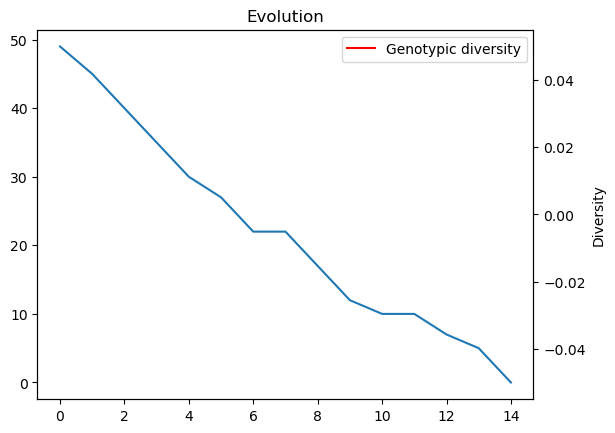

In [6]:
population = pop.Population(size=1000, initial_board=easy_board)
population.evolve(
    gens = 400,
    xo_prob = 0.9,
    mut_prob = 0.9,
    select_type='tournament',
    xo='row_wise_cycle',
    direction= 'random',
    mutation='change-smart',
    elite_size=20,
    swap_number=1,
    diversify='fitness-sharing',
    verbose= True,
    plateau_threshold=100,
    invert_distances=True,
    normalize_distances=False
)

population.plot_history( genodiv=True)

Clean code with experiments below

In [3]:
easy_board = np.array([[9,1,0,0,0,0,4,2,7],
 [0,0,0,0,0,3,9,1,5],
 [2,5,4,7,0,0,6,8,0],
 [4,7,0,0,8,6,0,3,2],
 [0,6,0,4,0,0,0,0,8],
 [5,0,0,0,1,2,0,6,0],
 [3,4,0,6,2,0,0,0,1],
 [0,0,0,3,0,0,0,0,0],
 [0,2,6,0,0,8,0,0,9]])

### Crrossovers tests

In [12]:
history_dict = {}
xo_types = ['multi-point', 'single-point', 'cycle',  'special-xo', 'single_point_tabular', 'row_wise_cycle']
for j in xo_types:
    histories = []
    for i in tqdm(range(30)):
        population = pop.Population(size=1000, initial_board=easy_board)
        population.evolve(
            gens = 100,
            xo_prob = 0.9,
            mut_prob = 0.1,
            select_type='tournament',
            xo=j,
            mutation='swap-smart',
            elite_size=200,
            swap_number=1,
            direction = 'random',
            diversify='fitness-sharing',
            verbose= False,
            plateau_threshold=10,
            invert_distances=True,
            normalize_distances=False
        )
        histories.append(population.history)
    history_dict[j] = histories

 13%|█▎        | 4/30 [02:20<13:44, 31.72s/it]

Solution found in generation 43!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 20%|██        | 6/30 [03:18<11:33, 28.90s/it]

Solution found in generation 48!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [05:31<09:39, 28.97s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 67%|██████▋   | 20/30 [11:57<05:33, 33.39s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [19:01<00:00, 38.04s/it]


In [13]:
import pickle

file_name = 'test_crossovers_new.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(history_dict, file)


XO Type: multi-point, Percentage solved: 0.0 %


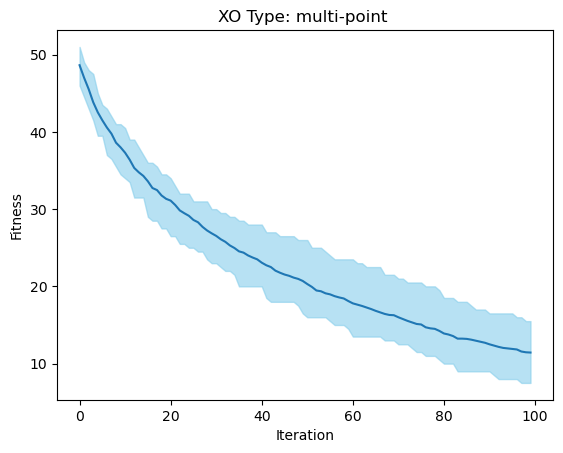

XO Type: single-point, Percentage solved: 0.0 %


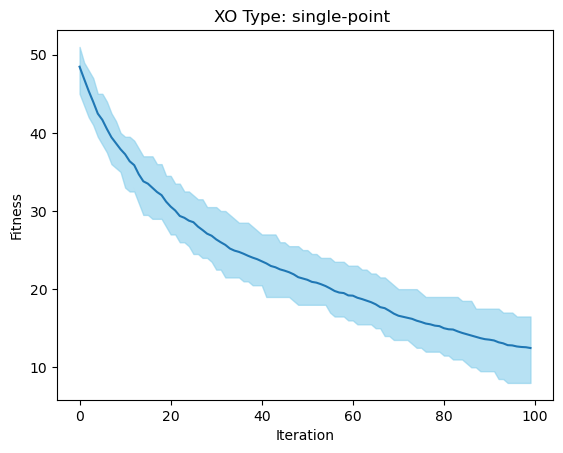

XO Type: cycle, Percentage solved: 0.0 %


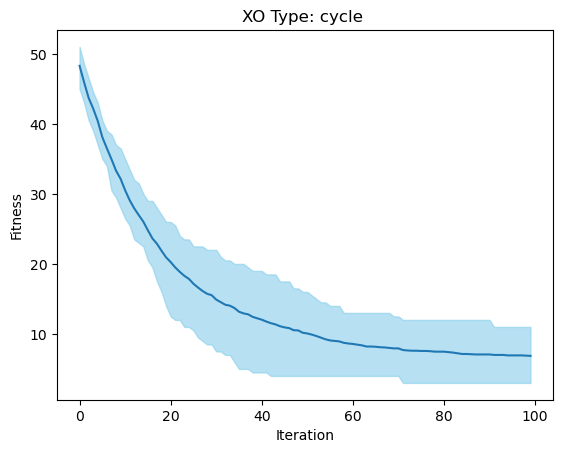

XO Type: special-xo, Percentage solved: 0.0 %


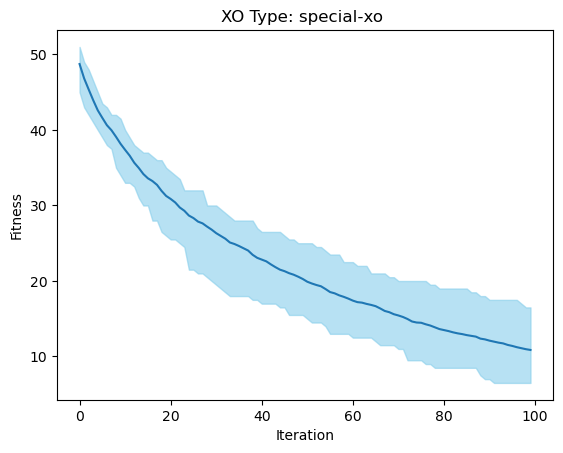

XO Type: single_point_tabular, Percentage solved: 13.33 %


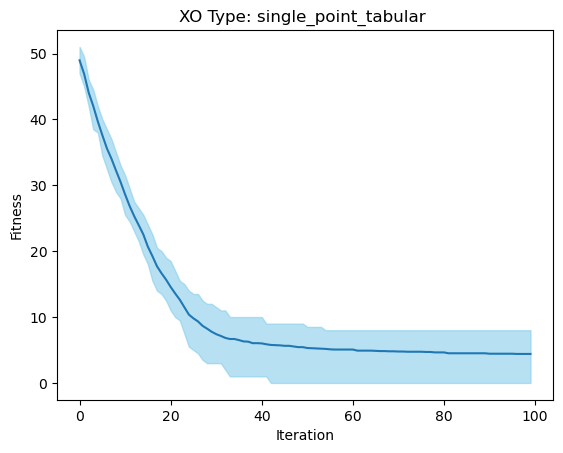

In [14]:
for j in xo_types:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"XO Type: {j}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    plt.fill_between(df.index, df.quantile(0.05, axis =1), df.quantile(0.95, axis =1), color='skyblue', alpha=.6)
    plt.plot(df['mean'])
    # plt.plot(pd.DataFrame(i).T[0])
    plt.title(f"XO Type: {j} ")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()

### Mutation tests

In [ ]:
mutations = ['swap', 'swap-smart', 'change', 'change-smart']

history_dict = {}
for j in mutations:
    histories = []
    for i in tqdm(range(30)):
        population = pop.Population(size=1000, initial_board=easy_board)
        population.evolve(
            gens = 100,
            xo_prob = 0.9,
            mut_prob = 0.1,
            select_type = 'tournament',
            xo = 'single_point_tabular',
            mutation = j,
            elite_size = 200,
            swap_number = 1,
            direction = 'random',
            diversify = 'fitness-sharing',
            verbose= False,
            plateau_threshold=10,
            invert_distances=True,
            normalize_distances=False
        )
        histories.append(population.history)
    history_dict[j] = histories

In [16]:
file_name = 'test_mutations.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(history_dict, file)

In [28]:
for j in mutations:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"Mutation Type: {j}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    print(f"Mean fitness at the end of run: {np.round(df['mean'].iloc[-1],2)}")

Mutation Type: swap, Percentage solved: 6.67 %
Mean fitness at the end of run: 6.03
Mutation Type: swap-smart, Percentage solved: 23.33 %
Mean fitness at the end of run: 3.9
Mutation Type: change, Percentage solved: 6.67 %
Mean fitness at the end of run: 7.67
Mutation Type: change-smart, Percentage solved: 23.33 %
Mean fitness at the end of run: 3.97


Mutation Type: swap, Percentage solved: 6.67 %


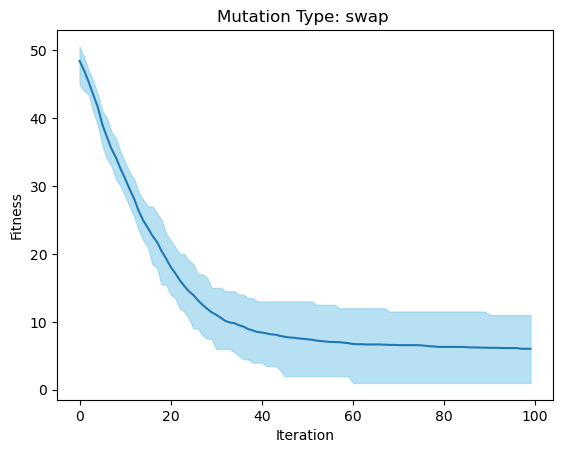

Mutation Type: swap-smart, Percentage solved: 23.33 %


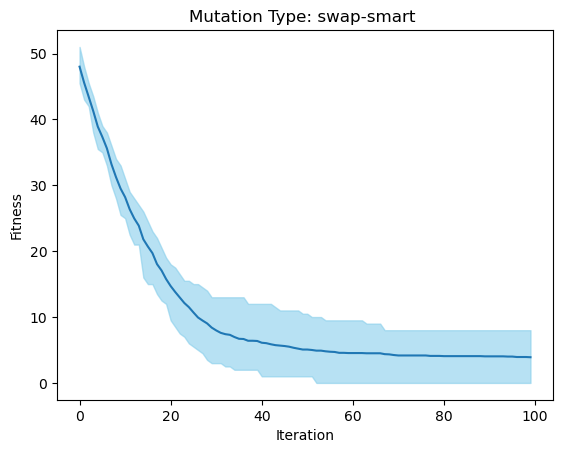

Mutation Type: change, Percentage solved: 6.67 %


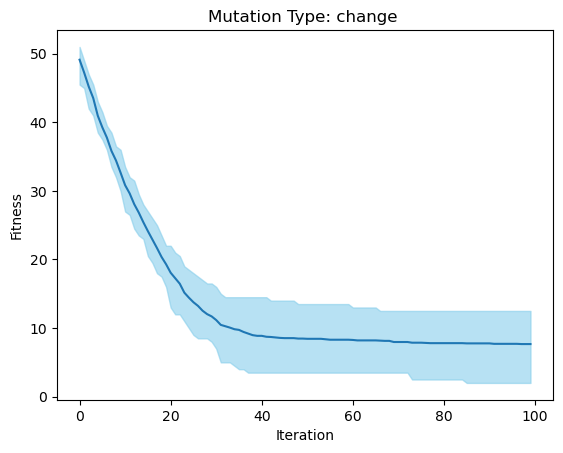

Mutation Type: change-smart, Percentage solved: 23.33 %


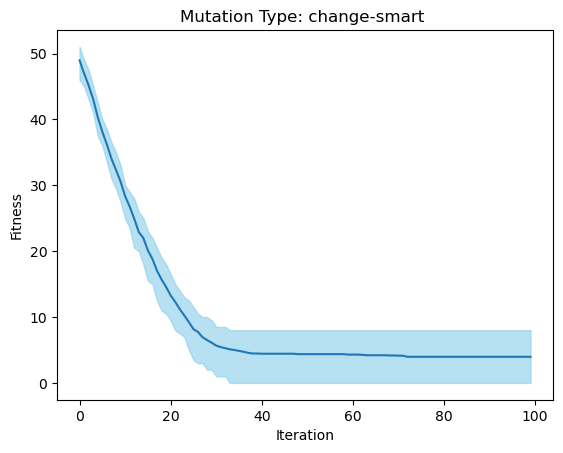

In [29]:
for j in mutations:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"Mutation Type: {j}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    plt.fill_between(df.index, df.quantile(0.05, axis =1), df.quantile(0.95, axis =1), color='skyblue', alpha=.6)
    plt.plot(df['mean'])
    # plt.plot(pd.DataFrame(i).T[0])
    plt.title(f"Mutation Type: {j} ")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()

Hard to choose between swap-smart and change smart. Change smart tends to be more stable and converge faster, however swap-smart lead to slightly better mean fitnees at the end. Although statistically not significant. We will use change-smart, since we value speed more in that case.

### Mutation andf XO rates tests

In [ ]:
mut_crossover_rates = [(0.1, 0.9), (0.5, 0.5), (0.9, 0.1), (0.1, 0.1), (0.9,0.9)]

history_dict = {}
for j in mut_crossover_rates:
    histories = []
    for i in tqdm(range(30)):
        population = pop.Population(size=1000, initial_board=easy_board)
        population.evolve(
            gens = 100,
            mut_prob = j[0],
            xo_prob = j[1],
            select_type = 'tournament',
            xo = 'single_point_tabular',
            mutation = 'change-smart',
            elite_size = 200,
            swap_number = 1,
            direction = 'random',
            diversify = 'fitness-sharing',
            verbose= False,
            plateau_threshold=10,
            invert_distances=True,
            normalize_distances=False
        )
        histories.append(population.history)
    history_dict[j] = histories

In [31]:
file_name = 'test_mut_crossover_rates.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(history_dict, file)

In [32]:
for j in mut_crossover_rates:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"Mutataion rate: {j[0]}, xo rate: {j[1]}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    print(f"Mean fitness at the end of run: {np.round(df['mean'].iloc[-1],2)}")

Mutataion rate: 0.1, xo rate: 0.9, Percentage solved: 20.0 %
Mean fitness at the end of run: 4.03
Mutataion rate: 0.5, xo rate: 0.5, Percentage solved: 36.67 %
Mean fitness at the end of run: 2.4
Mutataion rate: 0.9, xo rate: 0.1, Percentage solved: 0.0 %
Mean fitness at the end of run: 14.5
Mutataion rate: 0.1, xo rate: 0.1, Percentage solved: 0.0 %
Mean fitness at the end of run: 19.27
Mutataion rate: 0.9, xo rate: 0.9, Percentage solved: 83.33 %
Mean fitness at the end of run: 0.6


Mutataion rate: 0.1, xo rate: 0.9, Percentage solved: 20.0 %


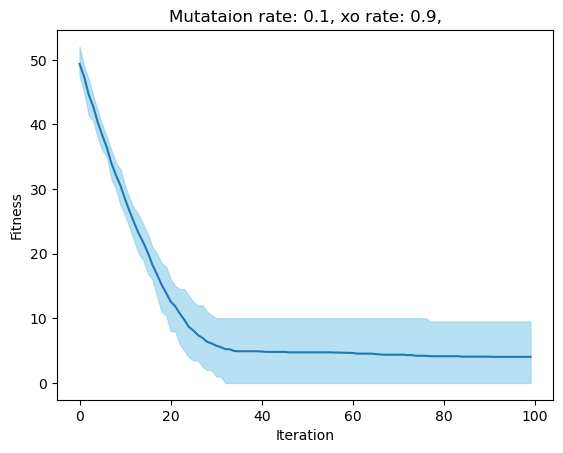

Mutataion rate: 0.5, xo rate: 0.5, Percentage solved: 36.67 %


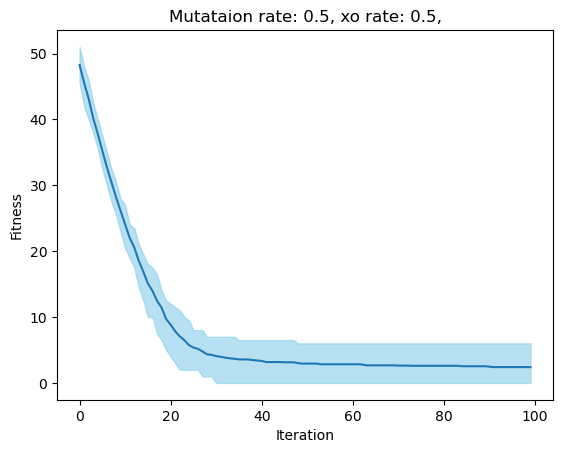

Mutataion rate: 0.9, xo rate: 0.1, Percentage solved: 0.0 %


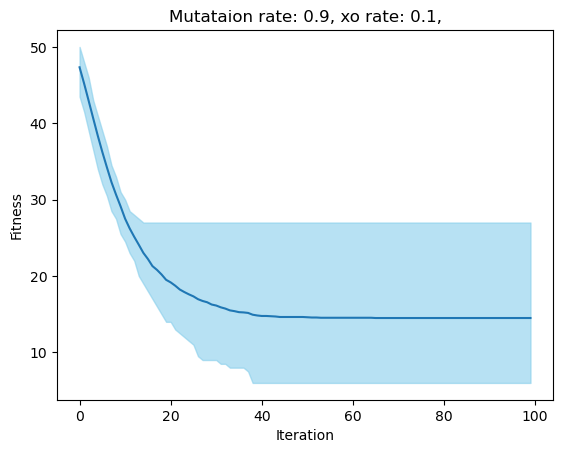

Mutataion rate: 0.1, xo rate: 0.1, Percentage solved: 0.0 %


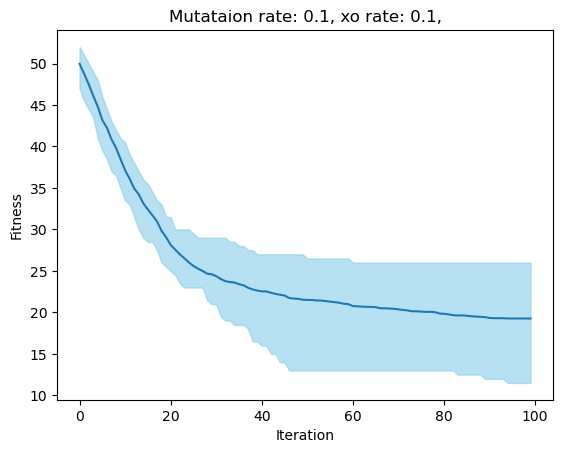

Mutataion rate: 0.9, xo rate: 0.9, Percentage solved: 83.33 %


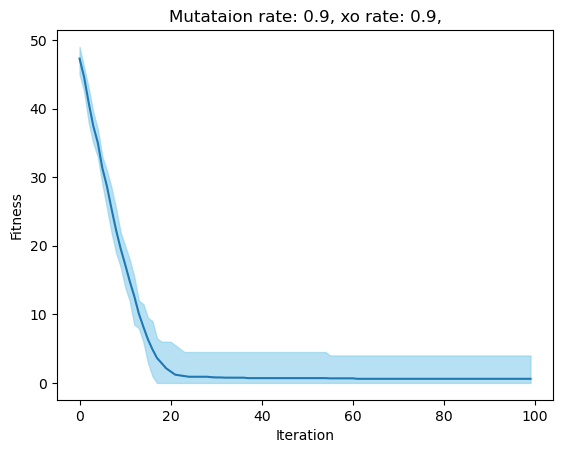

In [33]:
for j in mut_crossover_rates:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"Mutataion rate: {j[0]}, xo rate: {j[1]}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    plt.fill_between(df.index, df.quantile(0.05, axis =1), df.quantile(0.95, axis =1), color='skyblue', alpha=.6)
    plt.plot(df['mean'])
    # plt.plot(pd.DataFrame(i).T[0])
    plt.title(f"Mutataion rate: {j[0]}, xo rate: {j[1]},")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()

High mutation and xo rates work the best

### Selections tests

In [3]:
selections = ['roullette', 'tournament']

history_dict = {}
for j in selections:
    histories = []
    for i in tqdm(range(30)):
        population = pop.Population(size=1000, initial_board=easy_board)
        population.evolve(
            gens = 100,
            mut_prob = 0.9,
            xo_prob = 0.9,
            select_type = j,
            xo = 'single_point_tabular',
            mutation = 'change-smart',
            elite_size = 200,
            swap_number = 1,
            direction = 'random',
            diversify = 'fitness-sharing',
            verbose= False,
            plateau_threshold=10,
            invert_distances=True,
            normalize_distances=False
        )
        histories.append(population.history)
    history_dict[j] = histories

  3%|▎         | 1/30 [00:22<11:06, 22.97s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [00:46<10:54, 23.36s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 10%|█         | 3/30 [01:10<10:43, 23.82s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 13%|█▎        | 4/30 [01:29<09:27, 21.84s/it]

Solution found in generation 27!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 17%|█▋        | 5/30 [01:55<09:38, 23.13s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 20%|██        | 6/30 [02:23<09:53, 24.75s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 23%|██▎       | 7/30 [02:47<09:30, 24.80s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 27%|██▋       | 8/30 [03:16<09:29, 25.89s/it]

Solution found in generation 40!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 30%|███       | 9/30 [03:41<08:59, 25.71s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [04:07<08:38, 25.94s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [04:35<08:22, 26.43s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 40%|████      | 12/30 [05:00<07:45, 25.89s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [05:25<07:18, 25.77s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 47%|████▋     | 14/30 [05:50<06:47, 25.49s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [06:18<06:33, 26.25s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [06:45<06:10, 26.45s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 57%|█████▋    | 17/30 [07:13<05:50, 26.98s/it]

Solution found in generation 40!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 60%|██████    | 18/30 [07:45<05:39, 28.29s/it]

Solution found in generation 44!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [08:06<04:50, 26.38s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 67%|██████▋   | 20/30 [08:34<04:27, 26.75s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 70%|███████   | 21/30 [08:58<03:53, 25.89s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [09:22<03:21, 25.24s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [09:48<02:59, 25.58s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 80%|████████  | 24/30 [10:13<02:31, 25.27s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [10:38<02:06, 25.28s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 87%|████████▋ | 26/30 [11:05<01:43, 25.92s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 90%|█████████ | 27/30 [11:30<01:16, 25.43s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 93%|█████████▎| 28/30 [11:56<00:51, 25.82s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 97%|█████████▋| 29/30 [12:21<00:25, 25.53s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [12:48<00:00, 25.62s/it]


Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  3%|▎         | 1/30 [00:16<07:51, 16.27s/it]

Solution found in generation 20!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [00:31<07:25, 15.91s/it]

Solution found in generation 19!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 10%|█         | 3/30 [00:45<06:39, 14.79s/it]

Solution found in generation 17!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 13%|█▎        | 4/30 [01:04<07:04, 16.32s/it]

Solution found in generation 22!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 17%|█▋        | 5/30 [01:33<08:45, 21.04s/it]

Solution found in generation 22!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 20%|██        | 6/30 [01:52<08:12, 20.50s/it]

Solution found in generation 17!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 27%|██▋       | 8/30 [04:07<15:07, 41.24s/it]

Solution found in generation 21!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [06:22<16:44, 50.24s/it]

Solution found in generation 18!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [06:44<13:14, 41.82s/it]

Solution found in generation 23!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 40%|████      | 12/30 [07:10<11:02, 36.83s/it]

Solution found in generation 26!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [08:03<11:51, 41.83s/it]

Solution found in generation 47!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 47%|████▋     | 14/30 [08:22<09:15, 34.73s/it]

Solution found in generation 20!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [08:38<07:20, 29.37s/it]

Solution found in generation 19!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [09:07<06:47, 29.08s/it]

Solution found in generation 28!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 57%|█████▋    | 17/30 [09:30<05:56, 27.42s/it]

Solution found in generation 23!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 60%|██████    | 18/30 [09:51<05:03, 25.29s/it]

Solution found in generation 21!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [10:12<04:25, 24.15s/it]

Solution found in generation 22!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 67%|██████▋   | 20/30 [10:32<03:47, 22.73s/it]

Solution found in generation 22!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 70%|███████   | 21/30 [10:52<03:18, 22.04s/it]

Solution found in generation 21!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [11:18<03:05, 23.24s/it]

Solution found in generation 26!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [11:41<02:41, 23.08s/it]

Solution found in generation 24!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 80%|████████  | 24/30 [11:58<02:08, 21.43s/it]

Solution found in generation 19!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [13:27<03:28, 41.63s/it]

Solution found in generation 78!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 87%|████████▋ | 26/30 [13:43<02:15, 34.00s/it]

Solution found in generation 18!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 93%|█████████▎| 28/30 [16:02<01:34, 47.44s/it]

Solution found in generation 19!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 97%|█████████▋| 29/30 [16:17<00:37, 37.70s/it]

Solution found in generation 18!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [16:38<00:00, 33.30s/it]

Solution found in generation 22!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


In [6]:
file_name = 'test_selections.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(history_dict, file)

In [7]:
for j in selections:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"Selection Type: {j}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    print(f"Mean fitness at the end of run: {np.round(df['mean'].iloc[-1],2)}")

Selection Type: roullette, Percentage solved: 100.0 %
Mean fitness at the end of run: 0.0
Selection Type: tournament, Percentage solved: 90.0 %
Mean fitness at the end of run: 0.27


Selection Type: roullette, Percentage solved: 100.0 %


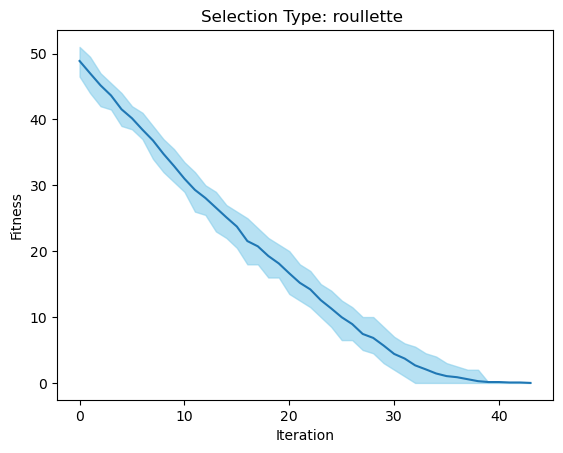

Selection Type: tournament, Percentage solved: 90.0 %


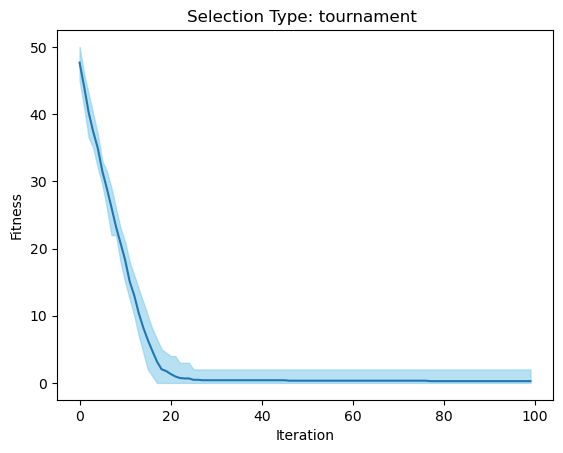

In [8]:
for j in selections:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"Selection Type: {j}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    plt.fill_between(df.index, df.quantile(0.05, axis =1), df.quantile(0.95, axis =1), color='skyblue', alpha=.6)
    plt.plot(df['mean'])
    # plt.plot(pd.DataFrame(i).T[0])
    plt.title(f"Selection Type: {j} ")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()

Tournament selection works faster (coverges after around 20 iterations always), however with roullette wheel we solved sudoku in all 30 cases after around 40 iterations max

### Pop size, gens, elite

To improve speed we also need to adjust population size, number of generations and elite size. To make it a fair competition we will look for absolute average time, not to amount generations, as we know that bigger populations will require less time to reach the solution.

In [13]:
gens_size_elite = [(100, 1000, 20), #size, gens, elite
                  (100, 1000, 50),
                  (100, 1000, 10),
                  (1000, 100, 100),
                  (1000, 100, 300),
                  (500, 200, 100),
                  (500, 200, 200),
                  ]

history_dict = {}
for j in gens_size_elite:
    histories = []
    for i in tqdm(range(30)):
        start_time = time.time()

        population = pop.Population(size=j[0], initial_board=easy_board)
        population.evolve(
            gens = j[1],
            mut_prob = 0.9,
            xo_prob = 0.9,
            select_type = 'roulette',
            xo = 'single_point_tabular',
            mutation = 'change-smart',
            elite_size = j[2],
            swap_number = 1,
            direction = 'random',
            diversify = 'fitness-sharing',
            verbose= False,
            plateau_threshold=j[1]/10,
            invert_distances=True,
            normalize_distances=False
        )
        end_time = time.time()
        elapsed_time = end_time - start_time
        histories.append((population.history, elapsed_time))
    history_dict[j] = histories

  3%|▎         | 1/30 [00:25<12:32, 25.94s/it]

Solution found in generation 278!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 23%|██▎       | 7/30 [07:47<22:28, 58.61s/it]

Solution found in generation 43!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [12:02<16:37, 52.48s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [13:41<13:13, 46.70s/it]

Solution found in generation 40!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [15:17<11:10, 44.73s/it]

Solution found in generation 213!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [15:22<07:38, 32.73s/it]

Solution found in generation 63!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [18:34<08:22, 45.66s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [22:01<07:14, 54.35s/it]

Solution found in generation 159!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [22:04<04:32, 38.91s/it]

Solution found in generation 41!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 97%|█████████▋| 29/30 [30:25<01:05, 65.92s/it]

Solution found in generation 212!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 13%|█▎        | 4/30 [04:36<24:07, 55.67s/it] 

Solution found in generation 69!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [13:15<24:23, 73.17s/it]

Solution found in generation 449!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [32:28<08:30, 72.88s/it] 

Solution found in generation 42!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [42:46<00:00, 85.56s/it] 


Solution found in generation 77!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  3%|▎         | 1/30 [00:03<01:55,  3.98s/it]

Solution found in generation 54!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [00:06<01:24,  3.03s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 10%|█         | 3/30 [00:08<01:12,  2.68s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 17%|█▋        | 5/30 [02:13<15:38, 37.54s/it]

Solution found in generation 490!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 23%|██▎       | 7/30 [03:53<15:15, 39.82s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 27%|██▋       | 8/30 [03:58<10:35, 28.87s/it]

Solution found in generation 69!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 30%|███       | 9/30 [04:01<07:14, 20.69s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [04:07<05:22, 16.13s/it]

Solution found in generation 75!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [07:00<10:26, 36.84s/it]

Solution found in generation 73!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [08:37<09:40, 38.68s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [14:15<12:43, 69.37s/it]

Solution found in generation 590!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [17:08<07:24, 55.57s/it]

Solution found in generation 45!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [17:11<04:37, 39.66s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 80%|████████  | 24/30 [18:19<04:48, 48.16s/it]

Solution found in generation 719!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [18:22<02:53, 34.63s/it]

Solution found in generation 43!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 90%|█████████ | 27/30 [20:04<02:01, 40.55s/it]

Solution found in generation 259!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 93%|█████████▎| 28/30 [20:07<00:58, 29.43s/it]

Solution found in generation 47!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  3%|▎         | 1/30 [00:33<16:17, 33.70s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [01:04<14:51, 31.84s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 10%|█         | 3/30 [01:36<14:30, 32.23s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 13%|█▎        | 4/30 [02:08<13:54, 32.08s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 17%|█▋        | 5/30 [02:46<14:09, 33.96s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 20%|██        | 6/30 [03:20<13:39, 34.16s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 23%|██▎       | 7/30 [03:54<13:01, 33.96s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 27%|██▋       | 8/30 [04:27<12:19, 33.63s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 30%|███       | 9/30 [04:53<10:59, 31.38s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [05:12<09:09, 27.48s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [05:33<08:07, 25.64s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 40%|████      | 12/30 [05:52<07:02, 23.48s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [06:12<06:23, 22.54s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 47%|████▋     | 14/30 [06:31<05:40, 21.31s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [06:50<05:08, 20.60s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [07:06<04:31, 19.38s/it]

Solution found in generation 29!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 57%|█████▋    | 17/30 [07:23<04:03, 18.76s/it]

Solution found in generation 30!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 60%|██████    | 18/30 [07:40<03:35, 17.97s/it]

Solution found in generation 28!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [07:58<03:17, 17.98s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 67%|██████▋   | 20/30 [08:17<03:03, 18.33s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 70%|███████   | 21/30 [08:36<02:46, 18.53s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [08:54<02:26, 18.34s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [09:17<02:17, 19.71s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 80%|████████  | 24/30 [09:36<01:57, 19.54s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [09:55<01:37, 19.41s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 87%|████████▋ | 26/30 [10:12<01:15, 18.76s/it]

Solution found in generation 30!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 90%|█████████ | 27/30 [10:31<00:56, 18.77s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 93%|█████████▎| 28/30 [10:46<00:35, 17.75s/it]

Solution found in generation 27!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 97%|█████████▋| 29/30 [11:05<00:18, 18.14s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [11:25<00:00, 22.84s/it]


Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  3%|▎         | 1/30 [00:21<10:17, 21.30s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [00:42<09:49, 21.06s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 10%|█         | 3/30 [01:03<09:26, 20.99s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 13%|█▎        | 4/30 [01:25<09:24, 21.69s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 17%|█▋        | 5/30 [01:45<08:42, 20.90s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 20%|██        | 6/30 [02:05<08:17, 20.72s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 23%|██▎       | 7/30 [02:25<07:48, 20.39s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 27%|██▋       | 8/30 [02:47<07:43, 21.07s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 30%|███       | 9/30 [03:06<07:08, 20.41s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [03:26<06:42, 20.15s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [03:47<06:30, 20.54s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 40%|████      | 12/30 [04:06<06:00, 20.04s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [04:26<05:40, 20.01s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 47%|████▋     | 14/30 [04:47<05:24, 20.28s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [05:08<05:08, 20.59s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [05:29<04:46, 20.47s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 57%|█████▋    | 17/30 [05:49<04:24, 20.33s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 60%|██████    | 18/30 [06:09<04:02, 20.22s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [06:31<03:48, 20.82s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 67%|██████▋   | 20/30 [06:51<03:25, 20.53s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 70%|███████   | 21/30 [07:13<03:09, 21.10s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [07:35<02:51, 21.44s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [07:56<02:27, 21.09s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 80%|████████  | 24/30 [08:18<02:08, 21.43s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [08:39<01:46, 21.23s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 87%|████████▋ | 26/30 [08:59<01:23, 20.92s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 90%|█████████ | 27/30 [09:20<01:02, 20.87s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 93%|█████████▎| 28/30 [09:38<00:40, 20.15s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 97%|█████████▋| 29/30 [09:58<00:20, 20.21s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [10:15<00:00, 20.53s/it]


Solution found in generation 29!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  3%|▎         | 1/30 [00:10<05:15, 10.89s/it]

Solution found in generation 44!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [00:18<04:18,  9.23s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 10%|█         | 3/30 [00:56<10:03, 22.36s/it]

Solution found in generation 141!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 13%|█▎        | 4/30 [01:06<07:30, 17.33s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 17%|█▋        | 5/30 [01:14<05:45, 13.81s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 20%|██        | 6/30 [01:21<04:36, 11.51s/it]

Solution found in generation 30!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 23%|██▎       | 7/30 [01:30<04:10, 10.89s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 30%|███       | 9/30 [02:42<07:36, 21.76s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [02:51<05:52, 17.62s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [02:59<04:42, 14.86s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 40%|████      | 12/30 [03:12<04:15, 14.21s/it]

Solution found in generation 49!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [03:21<03:32, 12.52s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 47%|████▋     | 14/30 [03:28<02:54, 10.92s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [03:34<02:20,  9.38s/it]

Solution found in generation 25!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [03:44<02:15,  9.71s/it]

Solution found in generation 42!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 57%|█████▋    | 17/30 [03:53<02:03,  9.50s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 60%|██████    | 18/30 [04:06<02:04, 10.35s/it]

Solution found in generation 48!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [04:13<01:42,  9.34s/it]

Solution found in generation 30!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 67%|██████▋   | 20/30 [04:20<01:27,  8.73s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 70%|███████   | 21/30 [04:27<01:15,  8.37s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [04:35<01:06,  8.27s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [04:43<00:57,  8.16s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 80%|████████  | 24/30 [04:52<00:50,  8.45s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [05:01<00:42,  8.43s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 87%|████████▋ | 26/30 [05:11<00:36,  9.09s/it]

Solution found in generation 41!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 90%|█████████ | 27/30 [05:20<00:26,  8.99s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 97%|█████████▋| 29/30 [06:30<00:19, 19.70s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [06:38<00:00, 13.30s/it]


Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  3%|▎         | 1/30 [00:09<04:44,  9.82s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [00:20<04:46, 10.22s/it]

Solution found in generation 41!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 10%|█         | 3/30 [00:31<04:43, 10.48s/it]

Solution found in generation 43!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 13%|█▎        | 4/30 [00:40<04:17,  9.91s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 17%|█▋        | 5/30 [00:48<03:56,  9.47s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 20%|██        | 6/30 [00:59<03:53,  9.71s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 27%|██▋       | 8/30 [02:13<08:05, 22.05s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 30%|███       | 9/30 [02:22<06:16, 17.91s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [02:31<05:02, 15.10s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [02:41<04:19, 13.66s/it]

Solution found in generation 42!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 40%|████      | 12/30 [02:53<03:56, 13.13s/it]

Solution found in generation 46!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [03:10<04:02, 14.25s/it]

Solution found in generation 62!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 47%|████▋     | 14/30 [03:18<03:18, 12.39s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [03:27<02:48, 11.25s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [03:37<02:31, 10.80s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 57%|█████▋    | 17/30 [03:48<02:24, 11.08s/it]

Solution found in generation 46!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 60%|██████    | 18/30 [03:58<02:08, 10.67s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [04:10<02:01, 11.07s/it]

Solution found in generation 48!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 67%|██████▋   | 20/30 [04:20<01:46, 10.69s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 70%|███████   | 21/30 [04:29<01:31, 10.11s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [04:42<01:28, 11.01s/it]

Solution found in generation 52!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [04:51<01:13, 10.53s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 80%|████████  | 24/30 [05:05<01:08, 11.45s/it]

Solution found in generation 53!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [05:13<00:51, 10.37s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 87%|████████▋ | 26/30 [05:23<00:41, 10.30s/it]

Solution found in generation 41!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 90%|█████████ | 27/30 [05:32<00:30, 10.13s/it]

Solution found in generation 41!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 93%|█████████▎| 28/30 [05:42<00:19,  9.99s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 97%|█████████▋| 29/30 [05:50<00:09,  9.36s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [05:59<00:00, 11.99s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


In [14]:
file_name = 'test_gens_size_elite.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(history_dict, file)

In [36]:
for j in gens_size_elite:
    hist = [i[0] for i in history_dict[j]]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    solved = np.where(df.iloc[-1] == 0)
    print(f"Population size: {j[0]}, number of generations: {j[1]}, elite size: {j[2]}")
    print(f"Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    print(f"Mean fitness at the end of run: {np.round(df['mean'].iloc[-1],2)}")
    times = np.array([i[1] for i in history_dict[j]])
    print(f"Mean time per run: {np.round(np.mean(times),2)}")
    print(f"Mean time per successful run: {np.round(np.mean(times[solved]),2)}, number of successful runs: {len(times[solved])}")
    print("\n")



Population size: 100, number of generations: 1000, elite size: 20
Percentage solved: 33.33 %
Mean fitness at the end of run: 2.5
Mean time per run: 63.41
Mean time per successful run: 9.57, number of successful runs: 10


Population size: 100, number of generations: 1000, elite size: 50
Percentage solved: 13.33 %
Mean fitness at the end of run: 3.83
Mean time per run: 85.55
Mean time per successful run: 13.05, number of successful runs: 4


Population size: 100, number of generations: 1000, elite size: 10
Percentage solved: 56.67 %
Mean fitness at the end of run: 1.87
Mean time per run: 46.49
Mean time per successful run: 14.07, number of successful runs: 17


Population size: 1000, number of generations: 100, elite size: 100
Percentage solved: 100.0 %
Mean fitness at the end of run: 0.0
Mean time per run: 22.84
Mean time per successful run: 22.84, number of successful runs: 30


Population size: 1000, number of generations: 100, elite size: 300
Percentage solved: 100.0 %
Mean fitness 

Population size: 100, number of generations: 1000, elite size: 20, Percentage solved: 33.33 %


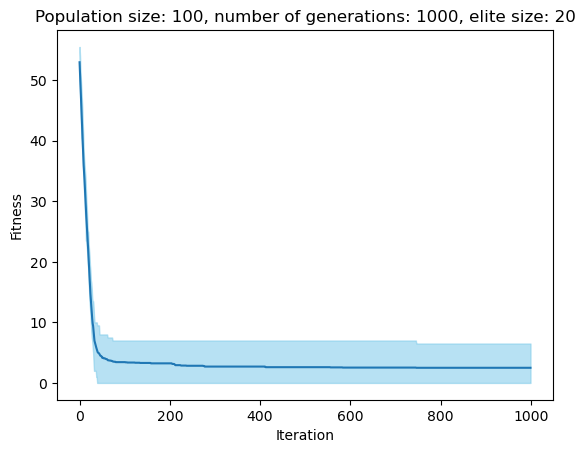

Population size: 100, number of generations: 1000, elite size: 50, Percentage solved: 13.33 %


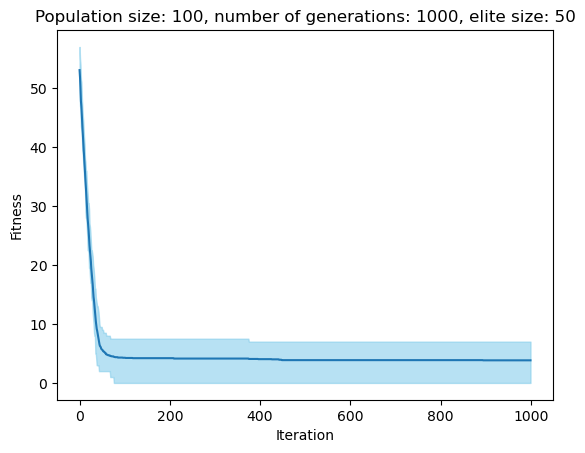

Population size: 100, number of generations: 1000, elite size: 10, Percentage solved: 56.67 %


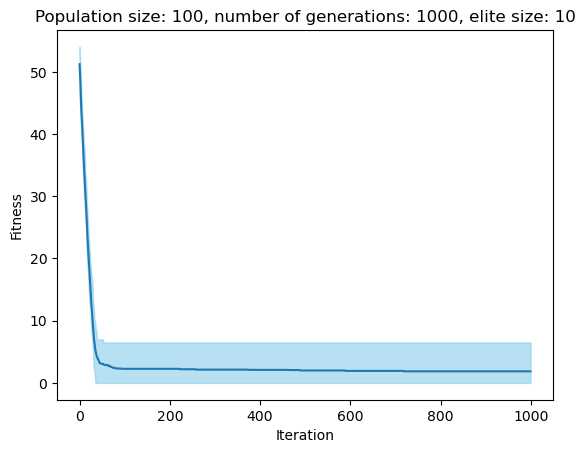

Population size: 1000, number of generations: 100, elite size: 100, Percentage solved: 100.0 %


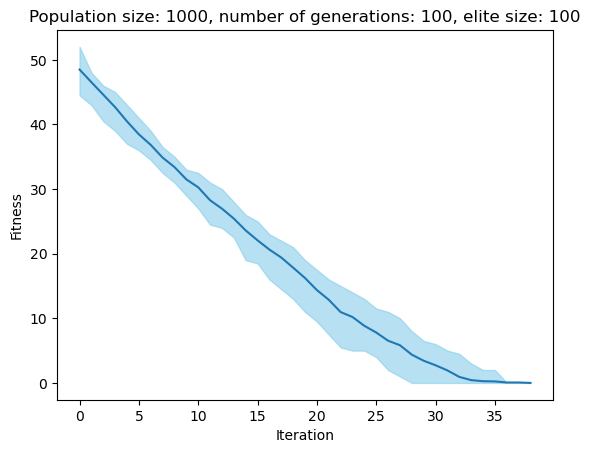

Population size: 1000, number of generations: 100, elite size: 300, Percentage solved: 100.0 %


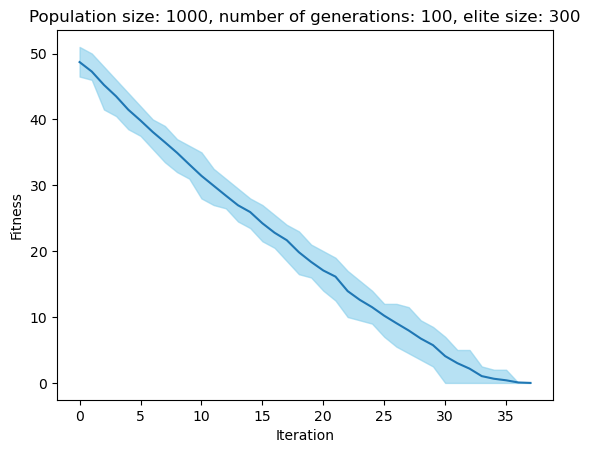

Population size: 500, number of generations: 200, elite size: 100, Percentage solved: 93.33 %


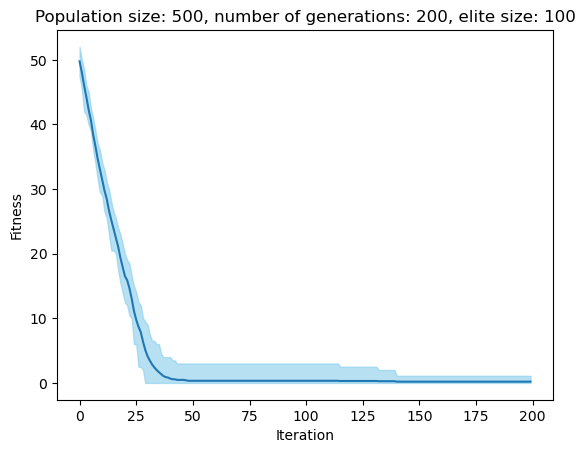

Population size: 500, number of generations: 200, elite size: 200, Percentage solved: 96.67 %


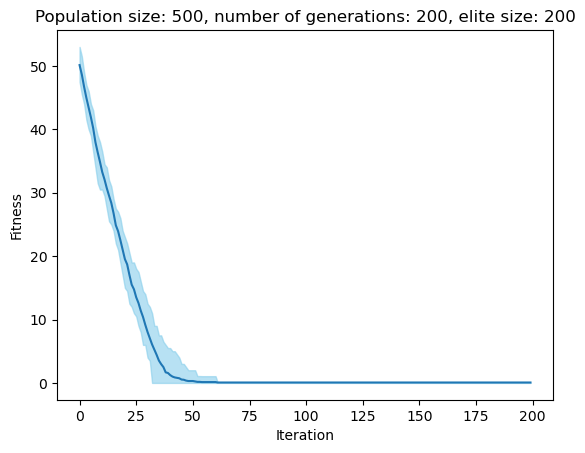

In [38]:
for j in gens_size_elite:
    hist = [i[0] for i in history_dict[j]]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"Population size: {j[0]}, number of generations: {j[1]}, elite size: {j[2]}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    plt.fill_between(df.index, df.quantile(0.05, axis =1), df.quantile(0.95, axis =1), color='skyblue', alpha=.6)
    plt.plot(df['mean'])
    # plt.plot(pd.DataFrame(i).T[0])
    plt.title(f"Population size: {j[0]}, number of generations: {j[1]}, elite size: {j[2]}")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()

Population size: 500, number of generations: 200, elite size: 200 seems as the best configuration.

Only once it didn't solve the puzzle, however, 29 other times it was twice faster then with population size 1000

### Test different boards